<a href="https://colab.research.google.com/github/axellebersier/Urban_data_mining/blob/main/Copie_de_Data_description_2000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Data Processing**


##Data description

Set up and load the data

In [33]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
rnd_seed = 42
rnd_gen = np.random.default_rng(rnd_seed)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [34]:
import pandas as pd

url_2020 = 'https://github.com/axellebersier/Urban_data_mining/raw/main/Data/c_2000_merged.xlsx'
df_2020 = pd.read_excel(url_2020, engine='openpyxl')



##Data Description 2010

In [35]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2015 entries, 0 to 2014
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    2015 non-null   int64         
 1   density               2015 non-null   float64       
 2   n_nationality         2015 non-null   int64         
 3   n_stranger            2015 non-null   int64         
 4   Population            2015 non-null   int64         
 5   dependency_ratio      2015 non-null   float64       
 6   s_infrastructure      2015 non-null   int64         
 7   s_agriculture         2015 non-null   int64         
 8   s_forested            2015 non-null   int64         
 9   s_improductible       2015 non-null   int64         
 10  natural_growth        2015 non-null   int64         
 11  p_surf_transport      2015 non-null   float64       
 12  commune               2015 non-null   object        
 13  no_mut_nvlle_cmne 

In [36]:
df_2020.describe()

,ID,density,n_nationality,n_stranger,Population,dependency_ratio,s_infrastructure,s_agriculture,s_forested,s_improductible,natural_growth,p_surf_transport,no_mut_nvlle_cmne,no_mut_ancienne_cmne,new_no_commune
count,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,708.000000,2015.000000
mean,2847.134491,592.166258,20.480893,948.099256,5843.011414,169.741919,277.008933,2031.721092,1618.874442,1441.282878,8.597519,7.043986,2417.991563,2818.762712,2846.818362
std,2110.755715,1081.123449,130.830764,3743.707947,14675.749443,150.187646,441.211835,3576.600338,3160.943191,6590.125149,39.570927,7.212186,780.288599,680.168562,2110.483369
min,1.000000,2.540000,0.000000,0.000000,44.000000,39.572193,2.000000,0.000000,0.000000,0.000000,-804.000000,0.000000,1033.000000,1226.000000,1.000000
25%,784.500000,88.845000,0.000000,45.000000,901.500000,69.163418,66.000000,365.500000,195.000000,4.000000,-1.000000,2.470152,1708.500000,2104.500000,784.500000
50%,2785.000000,227.580000,2.000000,154.000000,2220.000000,133.062331,150.000000,807.000000,520.000000,18.000000,4.000000,4.645616,2468.000000,3036.500000,2785.000000
75%,4761.000000,583.890000,9.000000,573.000000,5363.000000,212.757974,308.000000,2166.000000,1510.000000,108.500000,16.000000,8.575988,3106.500000,3287.250000,4758.500000
max,6810.000000,13417.110000,2508.000000,96954.000000,337900.000000,1505.333073,5424.000000,37704.000000,30855.000000,65004.000000,306.000000,49.342105,3963.000000,3960.000000,6810.000000


In [37]:
df_2020.head()

,ID,density,n_nationality,n_stranger,Population,dependency_ratio,s_infrastructure,s_agriculture,s_forested,s_improductible,natural_growth,p_surf_transport,commune,no_mut_nvlle_cmne,date_entree_ch,no_mut_ancienne_cmne,new_no_commune,new_commune
0,1,195.20,2,87,1517,52.720079,90,412,246,42,8,4.955527,Aeugst am Albis,1071,1976-11-15,NaN,1,Aeugst am Albis
1,14,1006.38,17,385,3840,52.765442,116,164,81,14,16,5.835544,Wettswil am Albis,1070,1976-11-15,NaN,14,Wettswil am Albis
2,24,70.96,1,20,739,70.491803,65,564,387,0,4,3.557312,Buch am Irchel,3293,2013-01-01,NaN,24,Buch am Irchel
3,159,1505.78,34,737,4930,63.991187,127,161,61,2,48,7.122507,Uetikon am See,1074,1977-03-10,NaN,159,Uetikon am See
4,161,1483.72,26,1822,11542,69.161590,318,168,298,1,-20,6.997455,Zollikon,1493,1986-01-01,NaN,161,Zollikon


In [38]:
df_2020 =  df_2020.iloc[:,1:11]
#df_2020.head()

#df_2020 = np.as(df_2020)
#print(df_2020)


In [39]:
df_2020 = pd.DataFrame(df_2020)
corr_matrix_2020 = df_2020.corr()
print(corr_matrix_2020)

                   density  n_nationality  n_stranger  Population  \
density           1.000000       0.433822    0.525177    0.600219   
n_nationality     0.433822       1.000000    0.843065    0.704886   
n_stranger        0.525177       0.843065    1.000000    0.924575   
Population        0.600219       0.704886    0.924575    1.000000   
dependency_ratio  0.164780       0.038838    0.048834    0.140862   
s_infrastructure  0.531781       0.757203    0.806334    0.856475   
s_agriculture    -0.066239       0.028164    0.057934    0.132817   
s_forested       -0.013649       0.248789    0.199330    0.214814   
s_improductible  -0.095810      -0.006335    0.006163    0.026274   
natural_growth    0.070361      -0.175440   -0.187954   -0.188535   

                  dependency_ratio  s_infrastructure  s_agriculture  \
density                   0.164780          0.531781      -0.066239   
n_nationality             0.038838          0.757203       0.028164   
n_stranger                0

##Description of the correlations for 2020

Correlation matrix

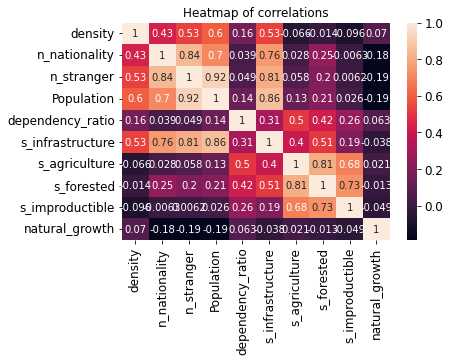

In [40]:
import seaborn as sn
import matplotlib.pyplot as plt

ax = sn.heatmap(corr_matrix_2020, annot=True)
plt.title("Heatmap of correlations")
plt.rcParams["figure.figsize"] = (20,60)
plt.show()


Principal component Analysis => cf code in R

##Number of clusters

Silhouette score

In [41]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

#df_2020 <- np.asmatrix(df_2020)

df_2020.shape
scaler = StandardScaler()
stdf_2020 = scaler.fit_transform(df_2020)
print(stdf_2020)

df_2020 = pd.DataFrame(stdf_2020)
print(df_2020)

df_2020.to_csv('data_standardized_2000', index = False, sep='\t')
df_2020.shape

[[-0.36727054 -0.14129307 -0.2300695  ... -0.43443211 -0.21238295
  -0.01510369]
 [ 0.3832278  -0.02661268 -0.15044951 ... -0.48664468 -0.21663279
   0.18711512]
 [-0.48221657 -0.14893843 -0.24797064 ... -0.3898141  -0.2187577
  -0.11621309]
 ...
 [-0.46666407 -0.15658379 -0.23728339 ...  0.5237476  -0.2187577
  -0.01510369]
 [-0.46666407 -0.15658379 -0.23728339 ...  0.5237476  -0.2187577
  -0.01510369]
 [-0.50984284 -0.13364772 -0.23942084 ... -0.05818519 -0.21663279
  -0.11621309]]
             0         1         2         3         4         5         6  \
0    -0.367271 -0.141293 -0.230069 -0.294846 -0.779364 -0.423958 -0.452979   
1     0.383228 -0.026613 -0.150450 -0.136518 -0.779062 -0.365015 -0.522335   
2    -0.482217 -0.148938 -0.247971 -0.347872 -0.661005 -0.480634 -0.410470   
3     0.845269  0.103358 -0.056402 -0.062228 -0.704299 -0.340077 -0.523174   
4     0.824860  0.042196  0.233490  0.388423 -0.669864  0.092929 -0.521217   
...        ...       ...       ...       ..

(2015, 10)

set up to do a K-Means analysis

In [42]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

Data preprocessing and standardization

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
stdf1 = scaler.fit_transform(df_2020)
print(stdf_2020)
df_2020 = pd.DataFrame(stdf_2020)
print(df_2020)
df_2020.to_csv('data_standardized', index = False, sep='\t')
df_2020.shape

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
stdf_2020= imputer.fit_transform(stdf_2020)

[[-0.36727054 -0.14129307 -0.2300695  ... -0.43443211 -0.21238295
  -0.01510369]
 [ 0.3832278  -0.02661268 -0.15044951 ... -0.48664468 -0.21663279
   0.18711512]
 [-0.48221657 -0.14893843 -0.24797064 ... -0.3898141  -0.2187577
  -0.11621309]
 ...
 [-0.46666407 -0.15658379 -0.23728339 ...  0.5237476  -0.2187577
  -0.01510369]
 [-0.46666407 -0.15658379 -0.23728339 ...  0.5237476  -0.2187577
  -0.01510369]
 [-0.50984284 -0.13364772 -0.23942084 ... -0.05818519 -0.21663279
  -0.11621309]]
             0         1         2         3         4         5         6  \
0    -0.367271 -0.141293 -0.230069 -0.294846 -0.779364 -0.423958 -0.452979   
1     0.383228 -0.026613 -0.150450 -0.136518 -0.779062 -0.365015 -0.522335   
2    -0.482217 -0.148938 -0.247971 -0.347872 -0.661005 -0.480634 -0.410470   
3     0.845269  0.103358 -0.056402 -0.062228 -0.704299 -0.340077 -0.523174   
4     0.824860  0.042196  0.233490  0.388423 -0.669864  0.092929 -0.521217   
...        ...       ...       ...       ..

Determination of the parameters and the number of clusters

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: F

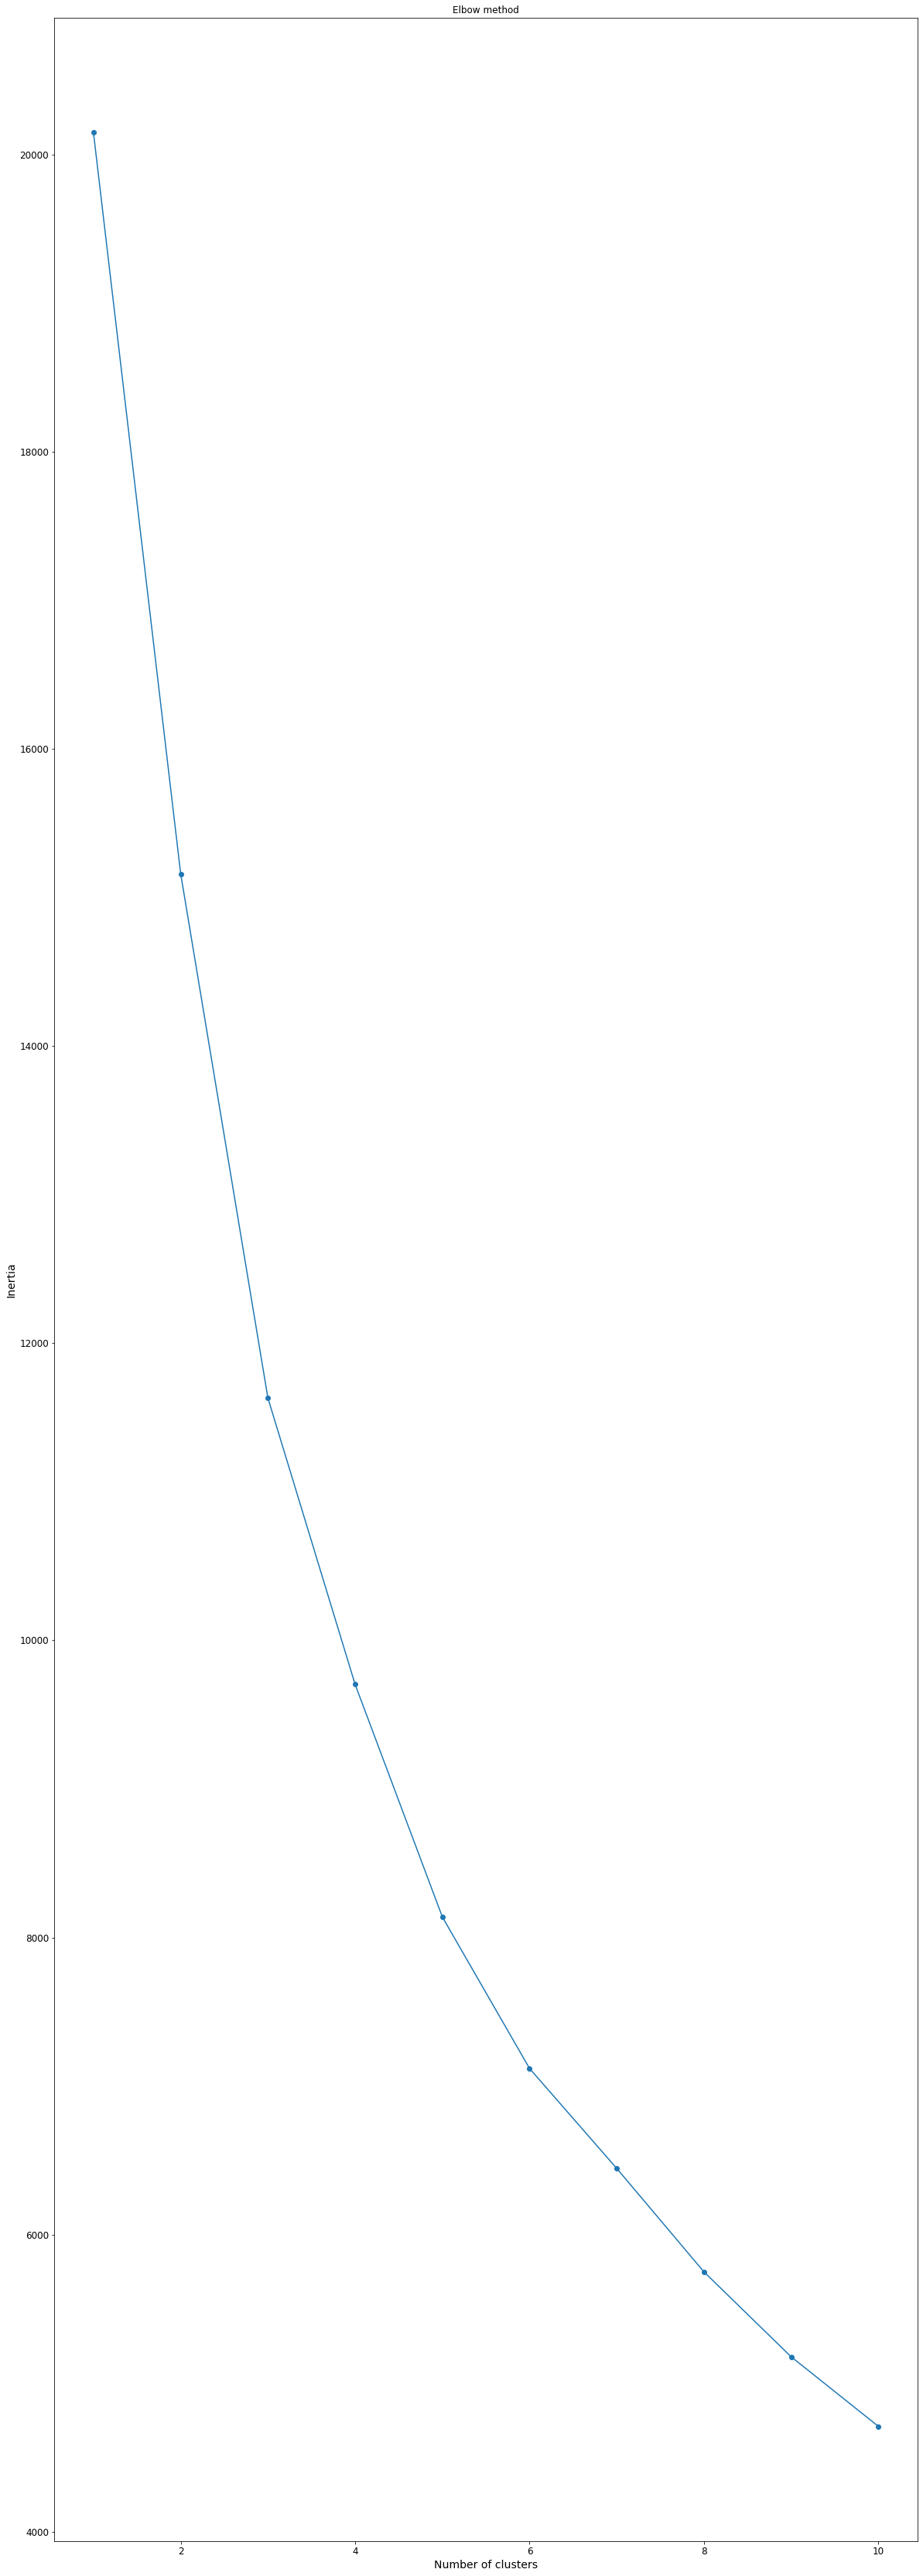

In [44]:
from sklearn.cluster import KMeans


inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(stdf_2020)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [45]:
silhouette_ann= []
for num_clusters in range(2,10):
  # initialise kmeans
  kmeans = KMeans(num_clusters)
  kmeans.fit(stdf_2020)
  cluster_labels = kmeans.labels_
  
# silhouette score
  silhouette_ann.append(silhouette_score(stdf_2020, cluster_labels))
silhouette_ann

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: F

[0.8463443131215409,
 0.738838009538517,
 0.7168562015502746,
 0.5410702034351853,
 0.5479920353486666,
 0.5457681973294396,
 0.4768455541249264,
 0.42719025858630083]

In [46]:
num_clusters
Ncluster = range(2,10)
Ncluster
silhouette_ann

[0.8463443131215409,
 0.738838009538517,
 0.7168562015502746,
 0.5410702034351853,
 0.5479920353486666,
 0.5457681973294396,
 0.4768455541249264,
 0.42719025858630083]

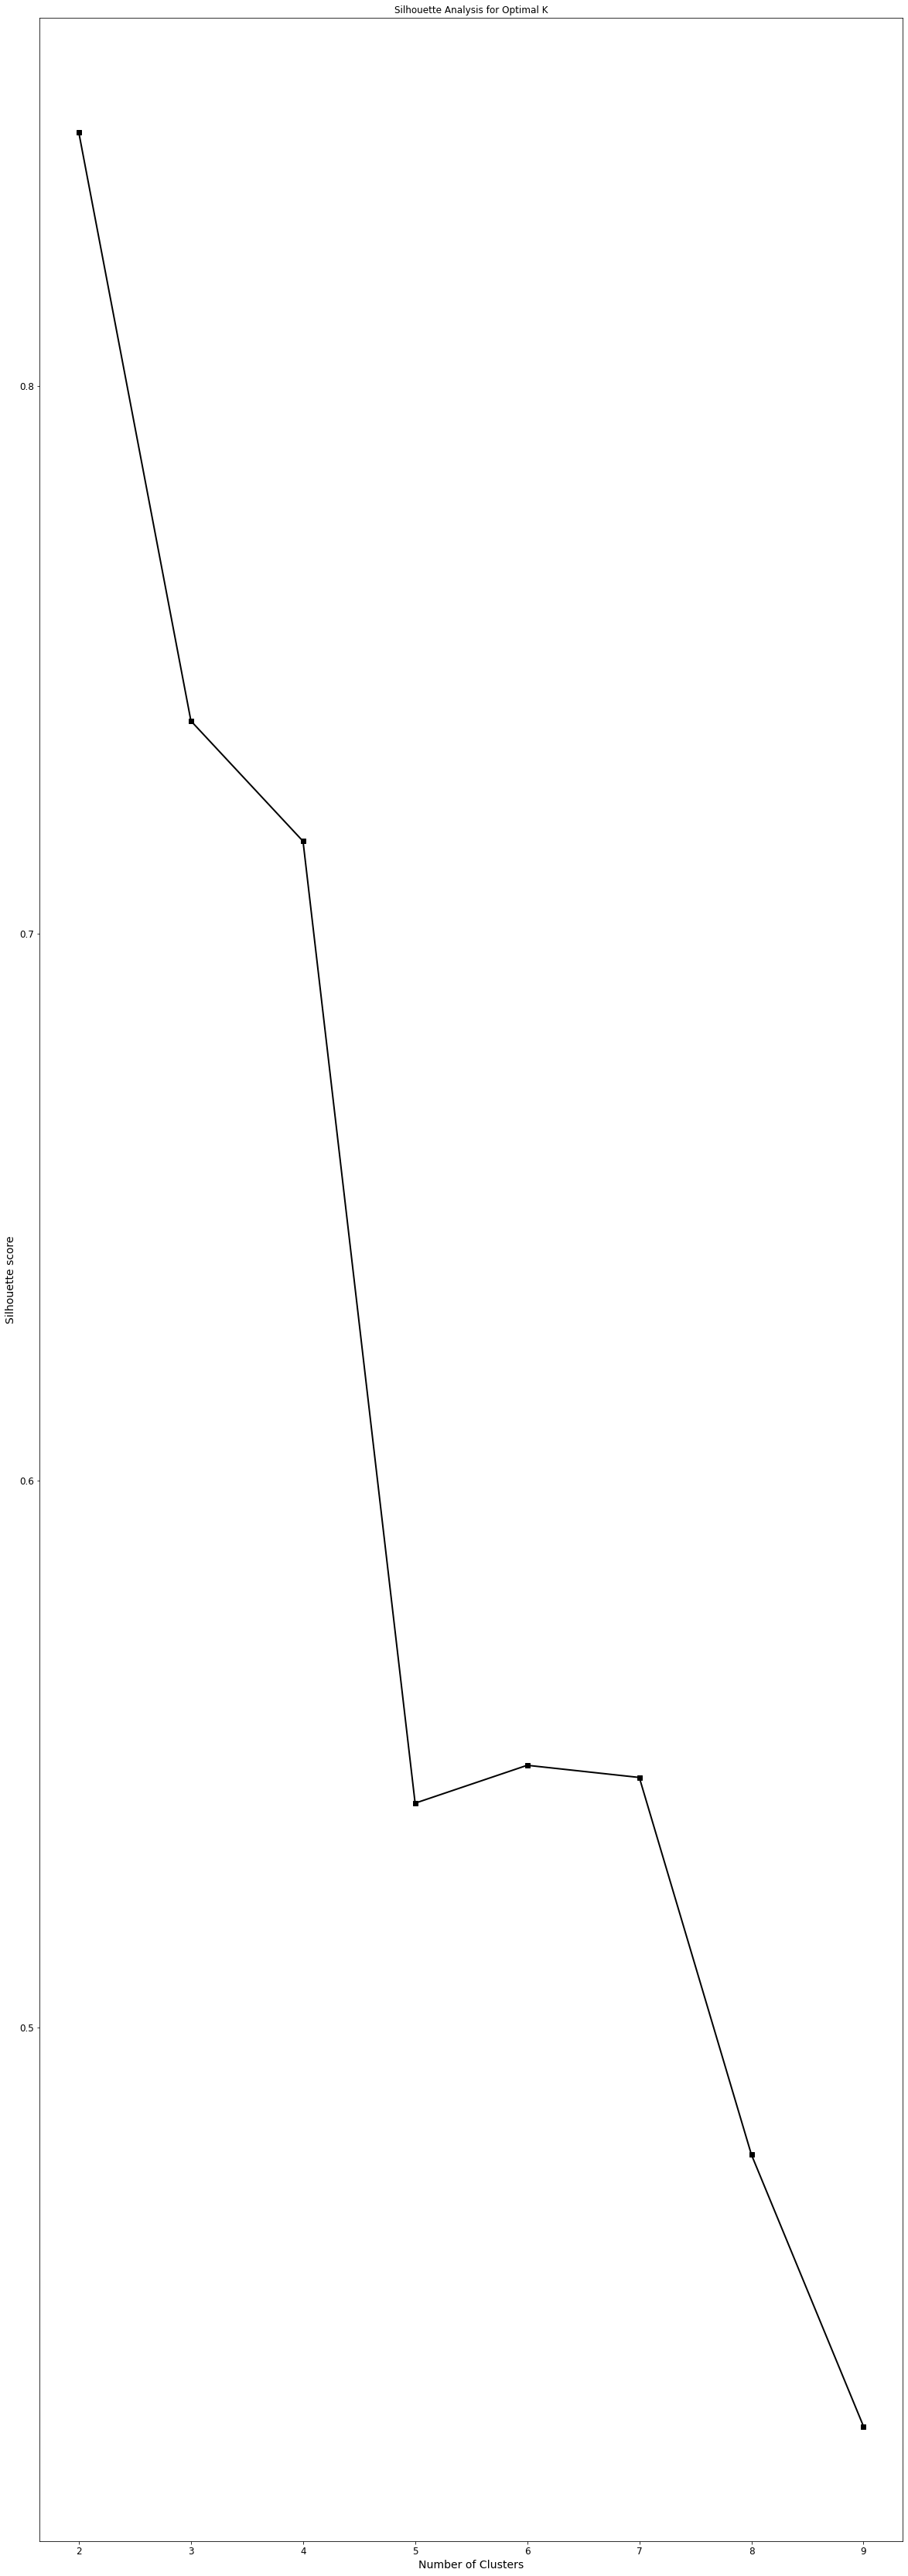

In [47]:
plt.plot(Ncluster,silhouette_ann,marker='s',c='k',lw=2)
plt.xlabel('Number of Clusters') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette Analysis for Optimal K')
plt.show()

In [48]:
df_2020 = pd.DataFrame(stdf_2020)

In [49]:
df_2020

,0,1,2,3,4,5,6,7,8,9
0,-0.367271,-0.141293,-0.230069,-0.294846,-0.779364,-0.423958,-0.452979,-0.434432,-0.212383,-0.015104
1,0.383228,-0.026613,-0.150450,-0.136518,-0.779062,-0.365015,-0.522335,-0.486645,-0.216633,0.187115
2,-0.482217,-0.148938,-0.247971,-0.347872,-0.661005,-0.480634,-0.410470,-0.389814,-0.218758,-0.116213
3,0.845269,0.103358,-0.056402,-0.062228,-0.704299,-0.340077,-0.523174,-0.492973,-0.218454,0.995990
4,0.824860,0.042196,0.233490,0.388423,-0.669864,0.092929,-0.521217,-0.417977,-0.218606,-0.722870
...,...,...,...,...,...,...,...,...,...,...
2010,-0.494161,-0.118357,-0.229268,-0.305001,0.374597,-0.278867,-0.282942,-0.162610,-0.215570,-0.267877
2011,-0.527273,-0.141293,-0.227398,-0.304797,2.617583,-0.149645,0.165080,0.518052,-0.205401,-0.293155
2012,-0.466664,-0.156584,-0.237283,-0.315020,1.968060,0.020383,0.725528,0.523748,-0.218758,-0.015104
2013,-0.466664,-0.156584,-0.237283,-0.315020,1.968060,0.020383,0.725528,0.523748,-0.218758,-0.015104


In [50]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(stdf1)
print(kmeans)

y_kmean = kmeans.predict(stdf1)
df['cluster']= y_kmean

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)


NameError: ignored

Same for 2010

## Self-Organizing Map algorithm

The analysis of the Self-Organizing Map algorithm has been done with R with the help of the code of Marj Tonini. Following his request, I won't make this code public. Thus, I will present the different steps and do not hesitate to write me if additional information is needed.

1. Load the library 'kohonen'.
2. Set up the model (defining the grid of the som, convert the data into a matrix.
3. Apply the som algorithm. 
4. Plot the heatmaps with the type "property" of the som.
5. Assign a number to each cluster. 
6. Describe the data repartition into each clusters